In [152]:
%run './util/neptune.py'
%run './util/visualisation.py'

neptune.clear()
g = neptune.graphTraversal()

clearing data...
clearing property graph data [edge_batch_size=200, edge_count=Unknown]...
clearing property graph data [vertex_batch_size=200, vertex_count=Unknown]...
clearing rdf data...
done
gremlin: wss://neptunedbcluster-btisoecouyjp.cluster-ciebzgejbcgu.us-east-1.neptune.amazonaws.com:8182/gremlin


In [153]:
g. \
addV('Car').property('brand', 'Ford').property('model', 'Mustang'). \
addV('Car').property('brand', 'Renault').property('model', 'clio'). \
addV('Driver').property('name','Arwen Undomiel').property('genre', 'Female').as_('Arwen'). \
addV('Driver').property('name','Harry Potter').property('genre', 'Male'). \
addV('Client').property('name','John Doe').property('email', 'john.doe@example.org').as_('John'). \
addV('Client').property('name','Bob Marley').property('email', 'bob.marley@example.org').as_('Bob'). \
addV('Trip').property('pick_up','-40.9987,19.685').property('drop_off', '-41.5587,8.598'). \
addE('HIRED_BY').to('John'). \
addV('Trip').property('pick_up','-40.9987,19.685').property('drop_off', '-41.5587,8.598'). \
addE('HIRED_BY').to('John'). \
addV('Trip').property('pick_up','-40.9987,19.685').property('drop_off', '-41.5587,8.598'). \
addE('HIRED_BY').to('Bob'). \
V().hasLabel('Car').has('brand','Ford').as_('a').V().hasLabel('Driver').has('name','Arwen Undomiel').addE('DRIVES').to('a').property('start', '2020-01-01').property('end', '2020-01-02'). \
V().hasLabel('Car').has('brand','Renault').as_('a').V().hasLabel('Driver').has('name','Harry Potter').addE('DRIVES').to('a').property('start', '2020-01-01').property('end', '2020-01-02'). \
next()

e[88bc256c-ff30-51b2-d8e4-1acea7766102][30bc256c-ff2c-9572-8ede-eb0c71c69c83-DRIVES->74bc256c-ff2c-4820-3dbc-8ea070c6502f]

In [154]:
drivers = g.V().hasLabel('Driver').values('name').toList()
clients = g.V().hasLabel('Client').values('name').toList()

def formatter(label, colors):
    if label in drivers:
        colors.append('blue')
    elif label in clients:
        colors.append('green')
    else:
        colors.append('yellow')

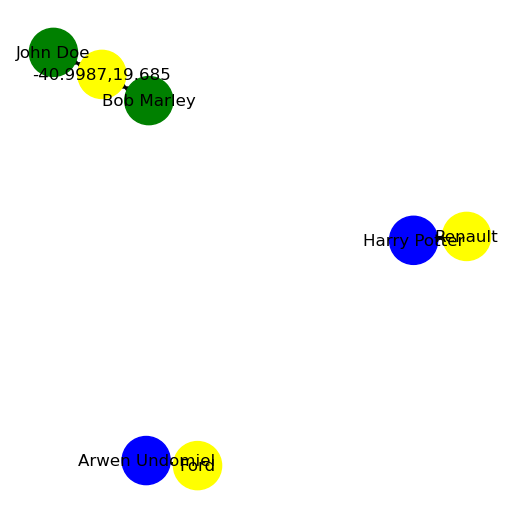

In [155]:
paths = g.V().both().path().by(coalesce(__.values('name'), __.values('brand'), __.values('pick_up'))).toList()


visualisation.plotPaths(paths, formatter)

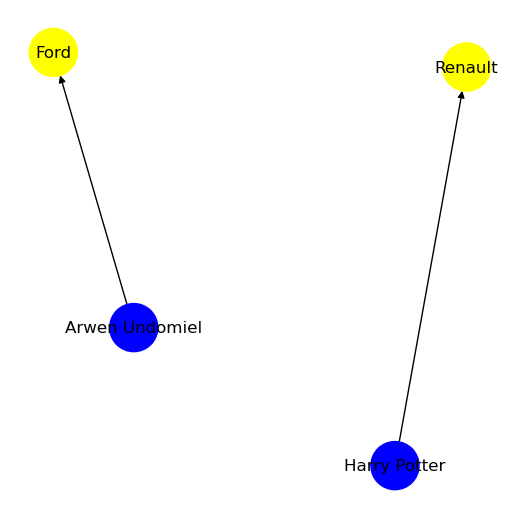

In [157]:
paths = g.V().hasLabel('Driver').both().path().by(coalesce(__.values('name'), __.values('brand'), __.values('pick_up'))).toList()

visualisation.plotPaths(paths, formatter)